## Google Playstore Case Study


The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:

- Does a higher size or price necessarily mean that an app would perform better than the other apps?

- Or does a higher number of installs give a clear picture of which app would have a better rating than others?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
!pip install nbformat 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#importing csv file
inp0 = pd.read_csv('C:\\Users\\FAMILY\\Downloads\\googleplaystore_v2.csv')

In [3]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
inp0.shape

(10841, 13)

In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
#sum of null values
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 1. Data Cleaning
#### Handling missing values for rating

- Ratings is the target variable
- Drop the records

In [7]:
inp1 = inp0[~inp0.Rating.isnull()]
inp1.shape

(9367, 13)

In [8]:
inp1.Rating.isnull().sum()

0

In [9]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

#### Explore/Understand the numlls for the column Android Version

In [10]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
inp1.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [12]:
inp1[(inp1['Android Ver'].isnull() & (inp1.Category == '1.9'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1.Category == '1.9'))]

In [14]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### The most common values in android version

In [15]:
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [16]:
inp1['Android Ver'].mode()[0]

'4.1 and up'

#### Filling the NAs with this value

In [17]:
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [18]:
inp1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [19]:
inp1['Android Ver'].isnull().sum()

0

In [20]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

### Missing values in current version

In [21]:
inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

#### Replacing Missing Values with 'Varies with Device'

In [22]:
inp1['Current Ver'].mode()[0]

'Varies with device'

In [23]:
inp1[inp1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


#### Removing the row 7333 as it is inconsistent

In [24]:
inp1.loc[7333,:]

App                  Dots puzzle
Category                  FAMILY
Rating                       4.0
Reviews                      179
Size                     14000.0
Installs                 50,000+
Type                        Paid
Price                      $0.99
Content Rating          Everyone
Genres                    Puzzle
Last Updated      April 18, 2018
Current Ver                  NaN
Android Ver           4.0 and up
Name: 7333, dtype: object

In [25]:
inp1[(inp1['Current Ver'].isnull() & (inp1.Category == 'FAMILY'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


#### Filling the NA values

In [26]:
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [27]:
inp1['Current Ver'].isnull().sum()

0

In [28]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [29]:
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

#### Changing the variables to the correct type

In [30]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [31]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Price Column

In [32]:
inp1.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [33]:
# Function to remove $ from Price column
inp1.Price = inp1.Price.apply(lambda x: 0 if x=='0' else float(x[1:]))

In [34]:
inp1.Price.dtype

dtype('float64')

#### Handling Reviews Column

In [35]:
inp1.Reviews = inp1.Reviews.astype('int32')

In [36]:
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [37]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Handling Installs Column

In [38]:
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [39]:
inp1.Installs.value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

#### Writing function to remove ',' & '+' and convert into int

In [40]:

def remove(x):
    rem_str = ',+'
    lst = []
    for i in x:
        if i not in rem_str:
            lst.append(i)
        else:
            pass
    return int(''.join(lst))

inp1.Installs = inp1.Installs.apply(lambda x:remove(x))

# Maybe it could have been done in this way too
# inp1.Installs = inp1.Installs.apply(lambda x:x.replace(',',''))
# inp1.Installs = inp1.Installs.apply(lambda x:x.replace('+',''))


In [41]:
inp1.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int64

In [42]:
inp1.Installs.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int64>

In [43]:
inp1.Price.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64>

### 2. Sanity checks

#### Avg rating between 1 - 5

In [44]:
inp1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### Reviews should be Reviews <= installs

In [45]:
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [46]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [47]:
inp1 = inp1[inp1.Reviews <= inp1.Installs]

In [48]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### For Free apps the price should not be more than 0

In [49]:
inp1[(inp1.Type == 'Free') & (inp1.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Indentifying and Handling Outliers/Extreme Values

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

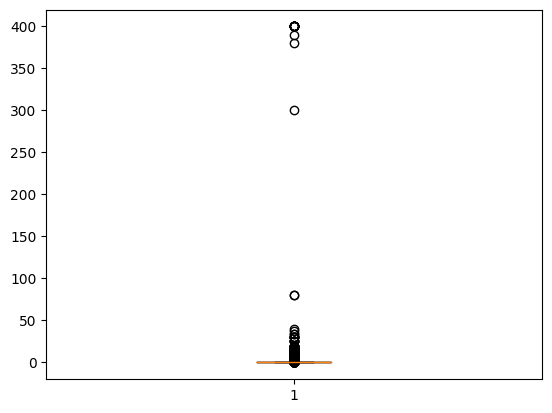

In [51]:
plt.boxplot(inp1.Price)
plt.show()

#### Checking the price more than $200

In [52]:
inp1[inp1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [53]:
inp1.Price.describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

#### Price - Boxplot

<AxesSubplot: >

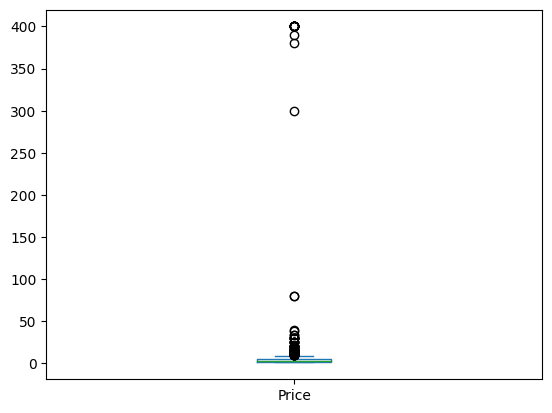

In [54]:
inp1[inp1.Price > 0].Price.plot.box()

In [55]:
inp1[inp1.Price >= 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up


In [56]:
inp1 = inp1[inp1.Price <= 30]
inp1.shape

(9338, 13)

In [57]:
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,9338.000000,9.338000e+03,9338.000000,9.338000e+03,9338.000000
mean,4.191776,5.155891e+05,22725.789334,1.795108e+07,0.301915
std,0.515031,3.148627e+06,21310.340299,9.136965e+07,1.669887
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.890000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,6.011500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.247100e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,29.990000


#### Reviews
#### How are the reviews distributed
Histogram for Reviews

In [58]:
# syntax of plt histogram
?plt.hist

#### Reviews Histogram

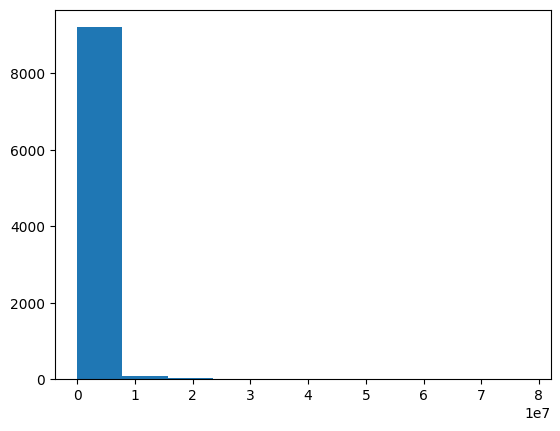

In [59]:
plt.hist(inp1.Reviews)
plt.show()

#### Reviews Box Plot

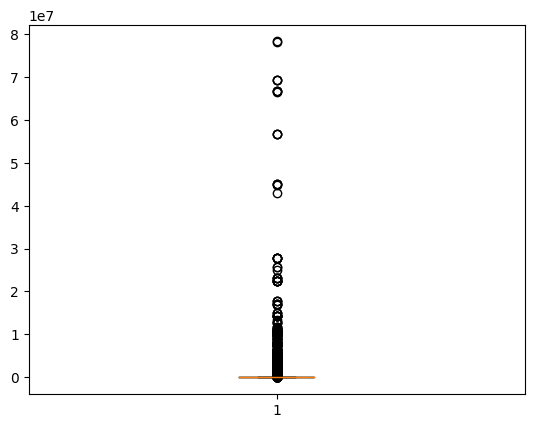

In [60]:
plt.boxplot(inp1.Reviews)
plt.show()

#### Checking the records with more than 10 million reviews

In [61]:
inp1[inp1.Reviews > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


#### Dropping records having more than 1M reviews as it will hamper our statistics

In [62]:
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

#### Reviews Histogram after dropping columns

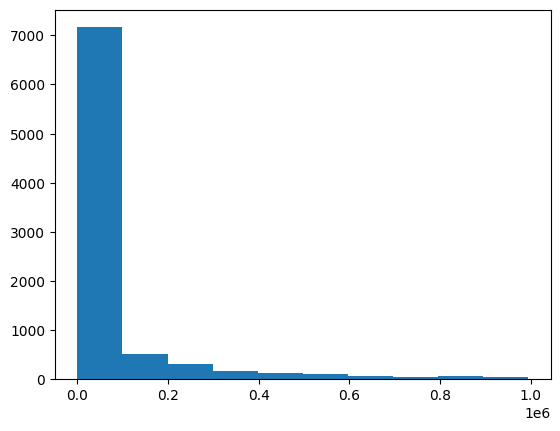

In [63]:
plt.hist(inp1.Reviews)
plt.show()

In [64]:
inp1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [65]:
inp2 = inp1[inp1.Installs <= 100000000]
inp2.shape

(8624, 13)

#### Histogram of Install less than 10000000

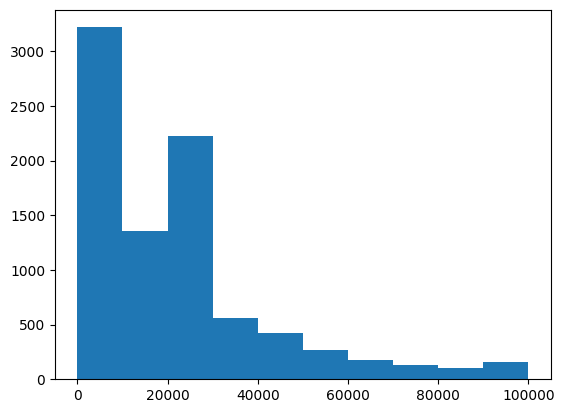

In [66]:
plt.hist(inp2.Size)
plt.show()

In [67]:
inp1.Size.info()

<class 'pandas.core.series.Series'>
Int64Index: 8634 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
8634 non-null   float64
dtypes: float64(1)
memory usage: 134.9 KB


In [68]:
inp1.Size.describe()

count      8634.000000
mean      21636.459060
std       20663.668474
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

In [69]:
inp1.Size.head()

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
Name: Size, dtype: float64

#### Size Box Plot

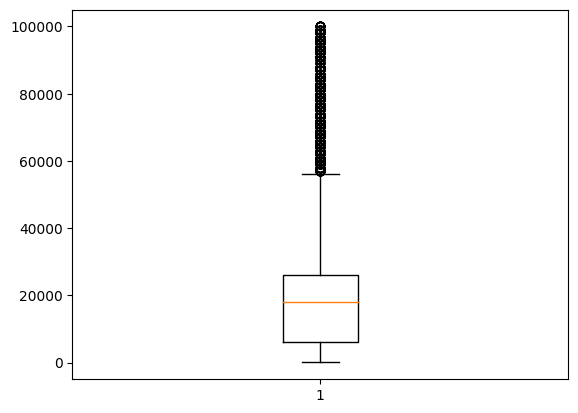

In [70]:
plt.boxplot(inp1.Size)
plt.show()

### 3. Data Analysis & Visualization
This analysis will answer the business questions

In [71]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Distribution of Ratings

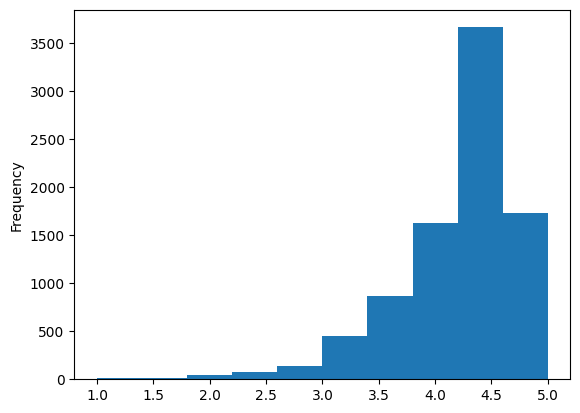

In [72]:
inp1.Rating.plot.hist()
plt.show()

In [73]:
# importing seaborn library
import seaborn as sns

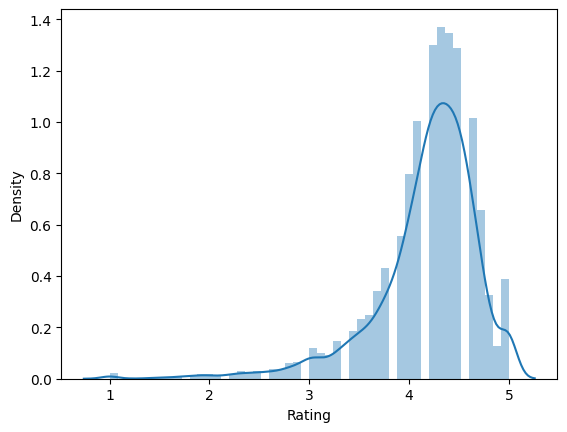

In [74]:
sns.distplot(inp1.Rating)
plt.show()

In the above graph we can see there is probability distribution, also a curve which shows probability density, which wasn't present in the earlier graph.

#### Histogram with limited number of bins - 20

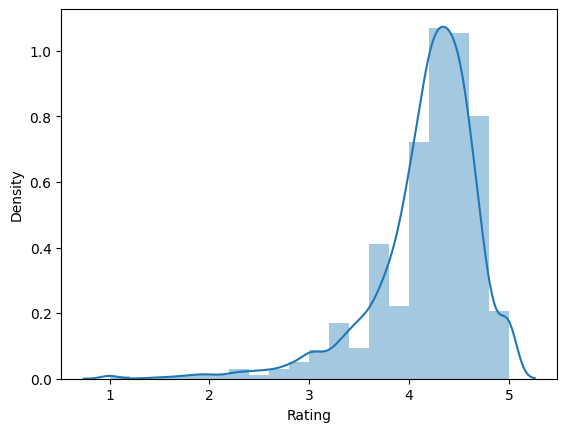

In [75]:
sns.distplot(inp1.Rating, bins = 20)
plt.show()

#### Changing the color of the plot

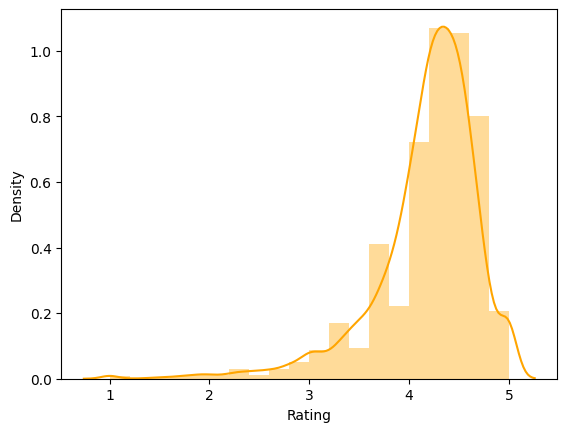

In [76]:
sns.distplot(inp1.Rating, bins = 20,color = 'orange')
plt.show()

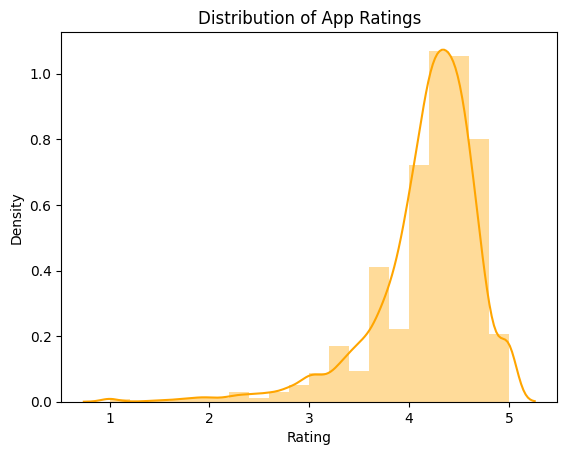

In [77]:
sns.distplot(inp1.Rating, bins = 20,color = 'orange')
plt.title('Distribution of App Ratings',fontsize = 12)
plt.show()

#### Different style for plot

In [78]:
?sns.set_style

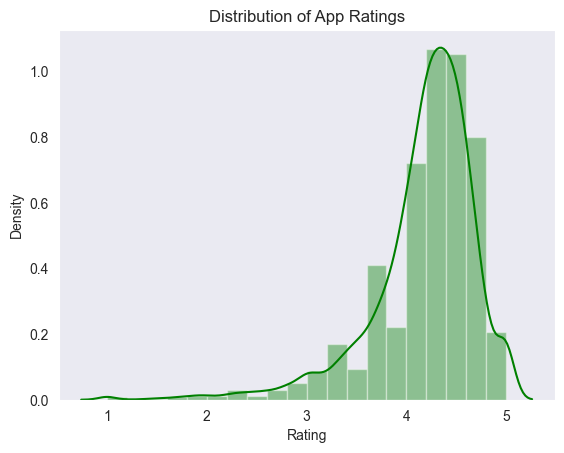

In [79]:
sns.set_style('dark')
sns.distplot(inp1.Rating, bins = 20,color = 'green')
plt.title('Distribution of App Ratings',fontsize = 12)
plt.show()

#### Matplotlib Themes/Styles

In [80]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

#### Plot with Grid

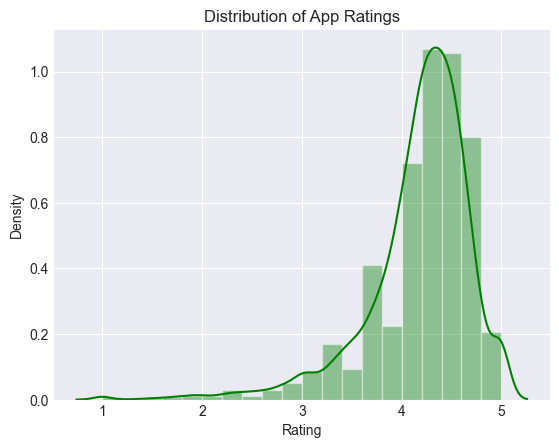

In [81]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.distplot(inp1.Rating, bins = 20,color = 'green')
plt.title('Distribution of App Ratings',fontsize = 12)
plt.show()

#### Plot with Dark Background

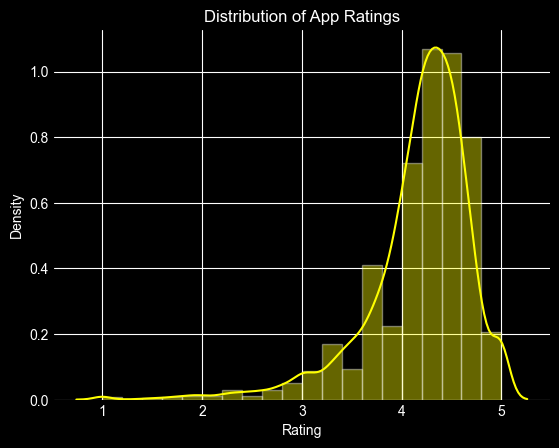

In [82]:
plt.style.use('dark_background')
sns.distplot(inp1.Rating, bins = 20,color = 'yellow')
plt.title('Distribution of App Ratings',fontsize = 12)
plt.show()

#### Plot with ggplot

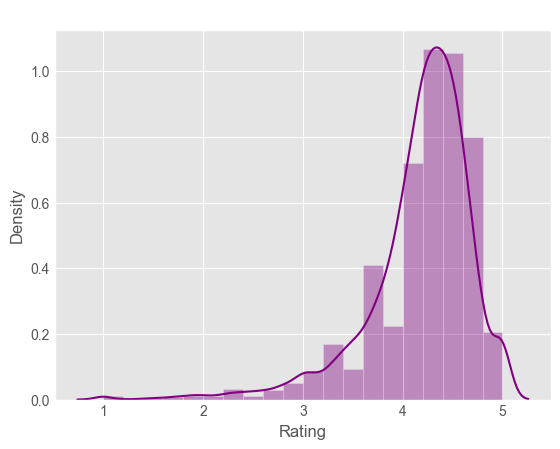

In [83]:
plt.style.use('ggplot')
sns.distplot(inp1.Rating, bins = 20,color = 'purple')
plt.title('Distribution of App Ratings',fontsize = 12)
plt.show()

#### Making the settings default

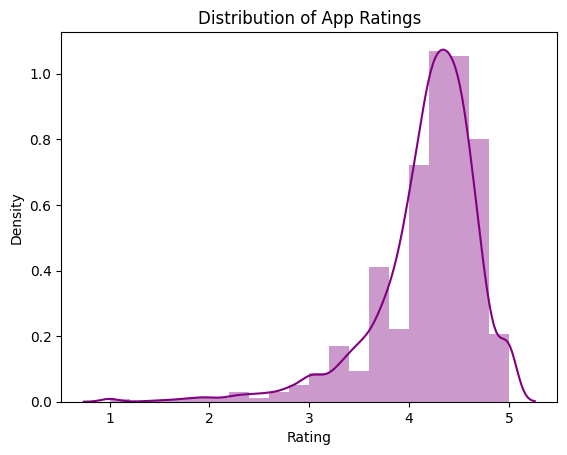

In [84]:
plt.style.use('default')
%matplotlib inline
sns.distplot(inp1.Rating, bins = 20,color = 'purple')
plt.title('Distribution of App Ratings',fontsize = 12)
plt.show()

In [85]:
inp1['Content Rating'].value_counts()

Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#### Dropping records for Adults only 18+ and Unrated

In [86]:
inp1.shape

(8634, 13)

In [87]:
inp1[inp1['Content Rating'].isin(['Adults only 18+', 'Unrated'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [88]:
#### Dropping the columns
inp1 = inp1[~inp1['Content Rating'].isin(['Adults only 18+', 'Unrated'])]

In [89]:
inp1.shape

(8630, 13)

In [90]:
inp1.reset_index(inplace = True, drop = True)

In [91]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8630 non-null   object 
 1   Category        8630 non-null   object 
 2   Rating          8630 non-null   float64
 3   Reviews         8630 non-null   int32  
 4   Size            8630 non-null   float64
 5   Installs        8630 non-null   int64  
 6   Type            8630 non-null   object 
 7   Price           8630 non-null   float64
 8   Content Rating  8630 non-null   object 
 9   Genres          8630 non-null   object 
 10  Last Updated    8630 non-null   object 
 11  Current Ver     8630 non-null   object 
 12  Android Ver     8630 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 842.9+ KB


In [92]:
inp1['Content Rating'].value_counts()

Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

#### Pie chart

<AxesSubplot: ylabel='Content Rating'>

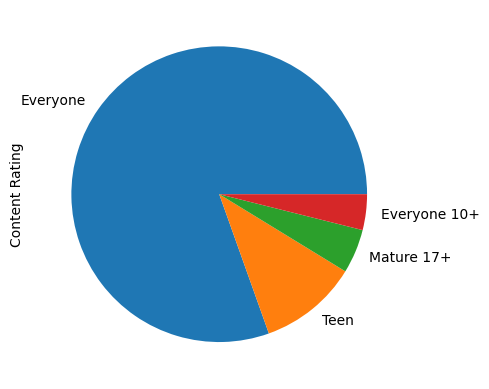

In [93]:
inp1['Content Rating'].value_counts().plot.pie()

#### Bar Chart

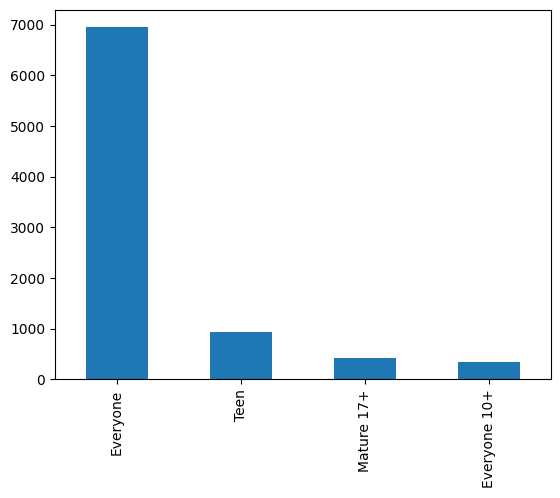

In [94]:
inp1['Content Rating'].value_counts().plot.bar()
plt.show()

#### Horizontal Bar Chart

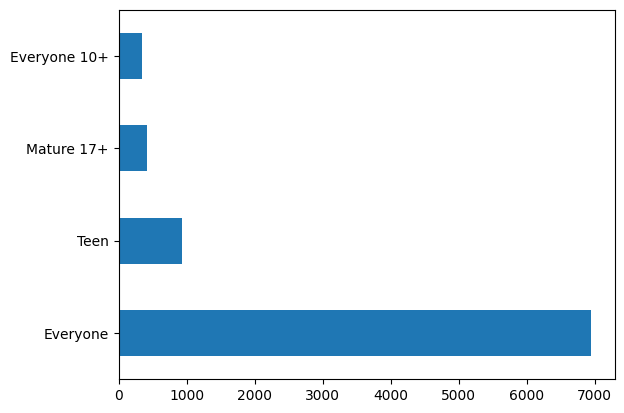

In [95]:
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

#### Bar plot for apps belonging to different types of ‘Android Ver’

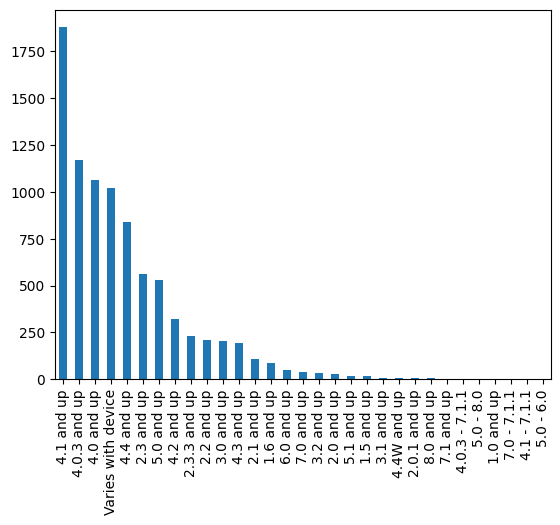

In [96]:
inp1['Android Ver'].value_counts().plot.bar()
plt.show()

#### Scatterplot 

Relationship between 2 numeric variables

#### Size vs Rating

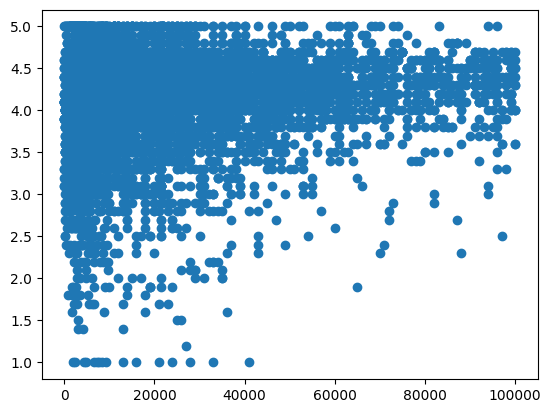

In [97]:
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

In [98]:
# Theme for the Joint Scatter Plot
sns.set_style('white')

#### Joint Scatter Plot

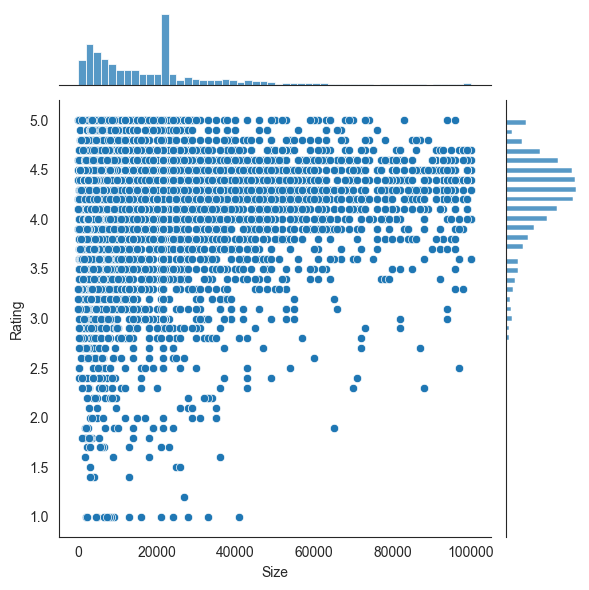

In [99]:
sns.jointplot(x = inp1.Size, y = inp1.Rating)
plt.show()

#### Price vs Rating

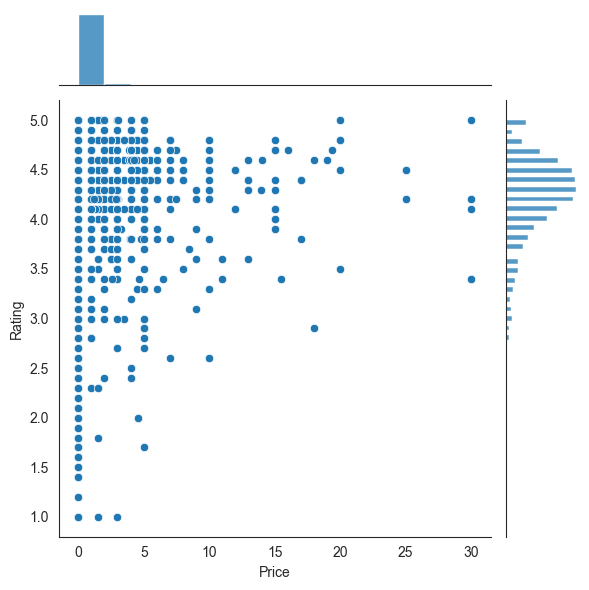

In [100]:
sns.jointplot(x = inp1.Price, y = inp1.Rating)
plt.show()

#### Price vs Rating - Regplot

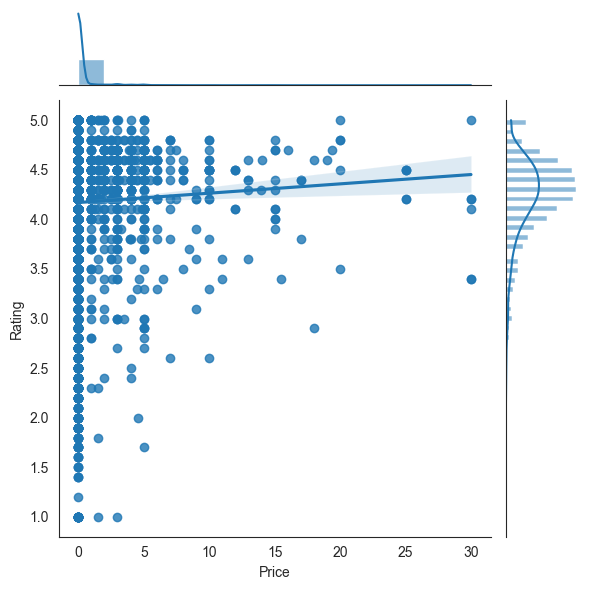

In [101]:
sns.jointplot(x = inp1.Price, y = inp1.Rating, kind = 'reg')
plt.show()

#### Reg plot for Price and Rating for only the paid apps

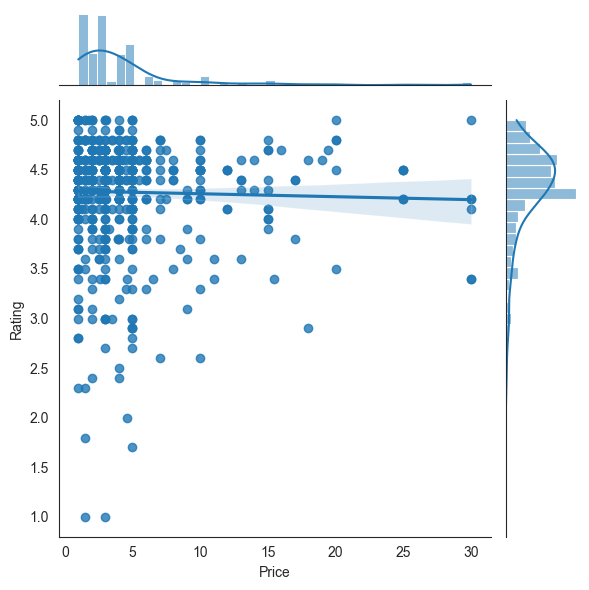

In [102]:
sns.jointplot(x = "Price", y = "Rating", data=inp1[inp1.Price>0], kind="reg")
plt.show()

#### Pairplot - Looking at all numeric columns together

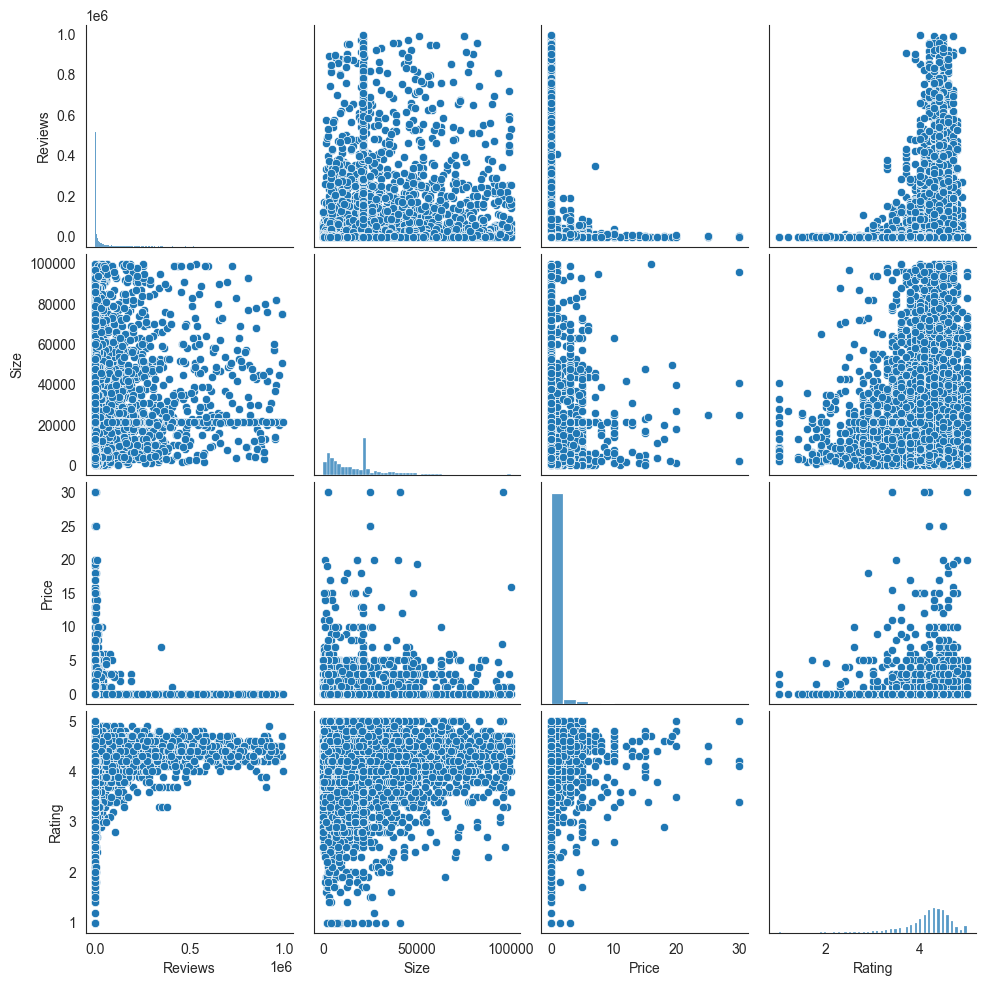

In [103]:
sns.pairplot(inp1[['Reviews','Size','Price','Rating']])
plt.show()

#### Content Rating vs Rating - Mean

In [104]:
inp1.groupby(['Content Rating'])['Rating'].mean()

Content Rating
Everyone        4.171108
Everyone 10+    4.217211
Mature 17+      4.099760
Teen            4.198821
Name: Rating, dtype: float64

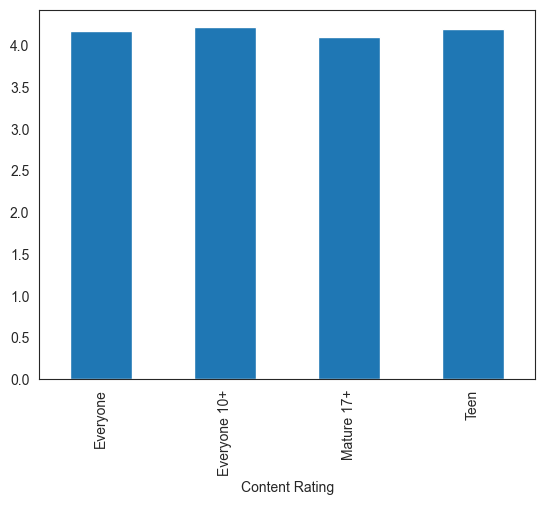

In [105]:
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()
plt.show()

#### Content Rating vs Rating - Median

In [106]:
inp1.groupby(['Content Rating'])['Rating'].median()

Content Rating
Everyone        4.3
Everyone 10+    4.3
Mature 17+      4.2
Teen            4.2
Name: Rating, dtype: float64

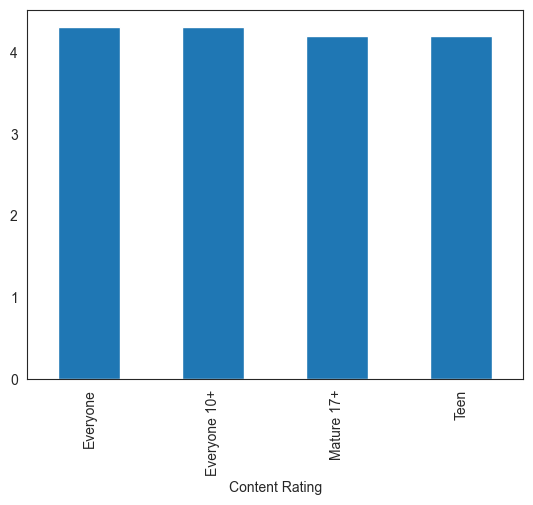

In [107]:
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

#### Basic Bar Plot - Mean

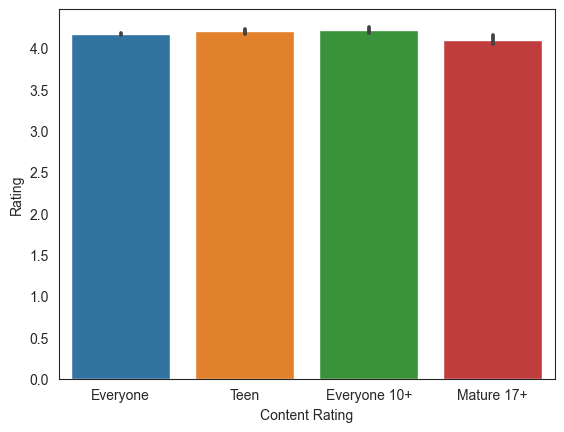

In [108]:
sns.barplot(data = inp1, x = 'Content Rating', y = 'Rating')
plt.show()

#### Basic Bar Plot - Median

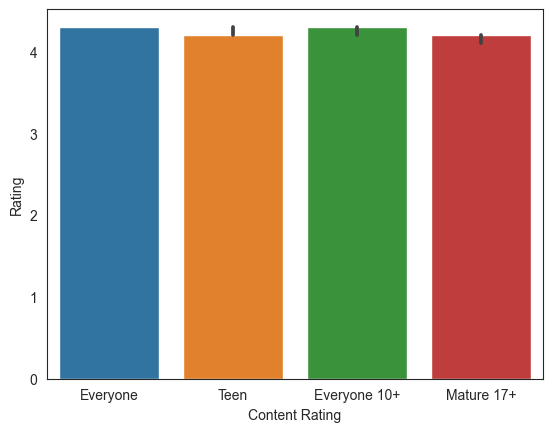

In [109]:
sns.barplot(data = inp1, x = 'Content Rating', y = 'Rating', estimator = np.median)
plt.show()

#### Choosing 5th Rating for the plot 

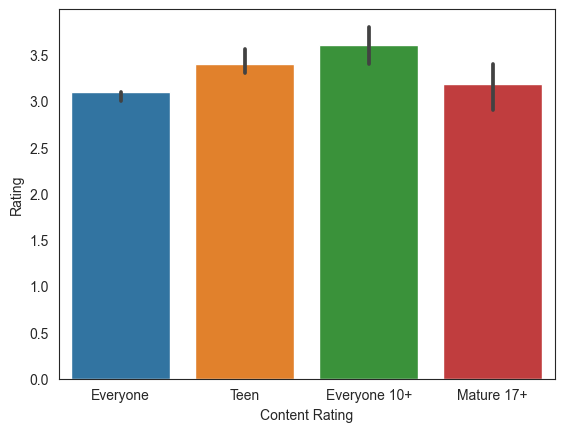

In [110]:
sns.barplot(data = inp1, x = 'Content Rating', y = 'Rating', estimator = (lambda x: np.quantile(x,0.05)))
plt.show()

#### Choosing minimum Rating for the plot 

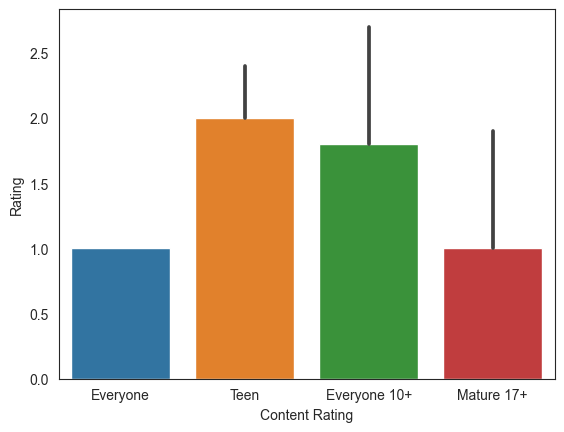

In [111]:
sns.barplot(data = inp1, x = 'Content Rating', y = 'Rating', estimator = (lambda x: np.min(x)))
plt.show()

#### Box plot of ratings for each content rating

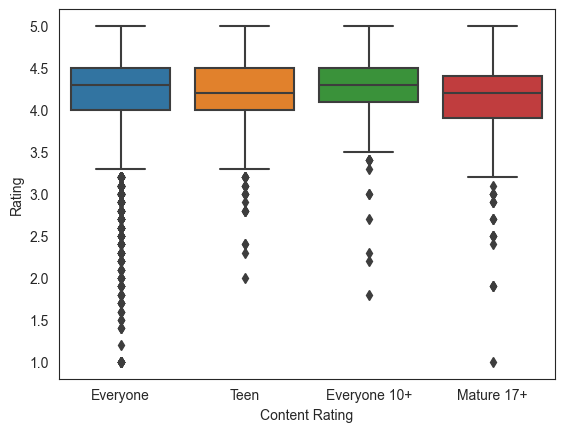

In [112]:
sns.boxplot(x = inp1['Content Rating'], y = inp1['Rating'])
plt.show()

#### Numerical vs Categorical View -  where every value is shown with category

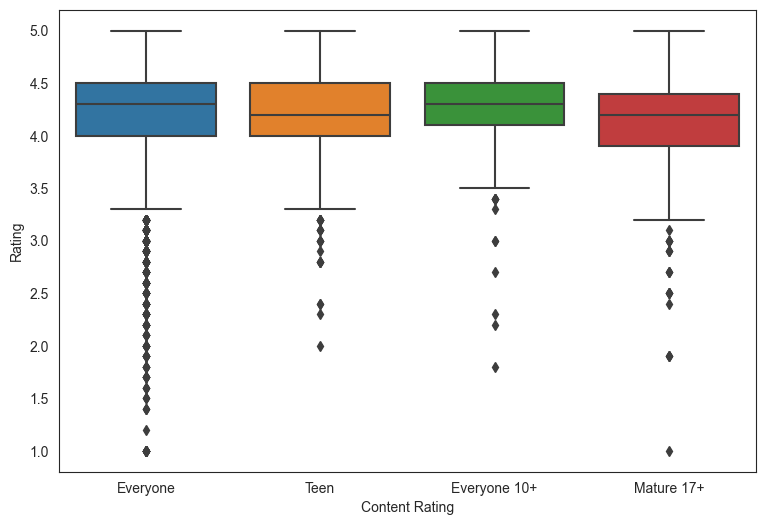

In [113]:
# Increasing the size of the plot
plt.figure(figsize = [9,6])
sns.boxplot(x = inp1['Content Rating'], y = inp1['Rating'])
plt.show()

#### Box plot for the Rating column

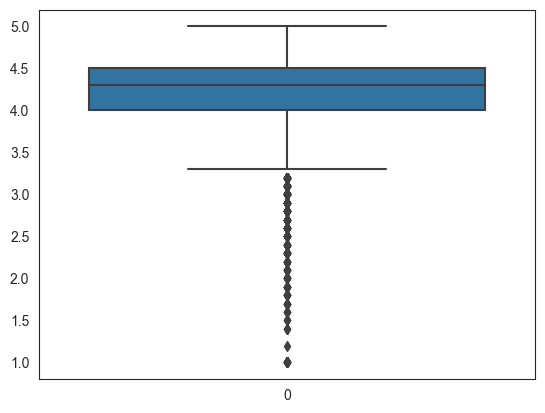

In [114]:
sns.boxplot(inp1['Rating'])
plt.show()

#### Box plot for the four most popular Genres

In [115]:
inp1['Genres'].value_counts()

Tools                     694
Entertainment             508
Education                 464
Medical                   344
Finance                   315
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 115, dtype: int64

#### Selecting the most popular genre

In [116]:
c = ['Tools','Entertainment','Medical','Education']
inp5= inp1[inp1['Genres'].isin(c)]

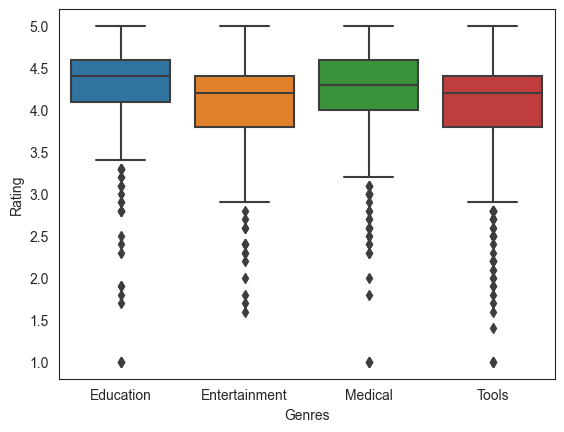

In [117]:
sns.boxplot(x = inp5['Genres'], y = inp1.Rating)
plt.show()

#### Heatmaps

#### Rating vs Size vs Content Rating
Converting size to categorical buckets as it is numerical

In [118]:
?pd.qcut

In [119]:
pd.qcut(inp1.Size, [0,0.2,0.4,0.6,0.8,1], ['VL','L','M','H','VH'])

0        M
1        M
2        L
3        H
4       VL
        ..
8625    VL
8626    VH
8627    VL
8628     M
8629     M
Name: Size, Length: 8630, dtype: category
Categories (5, object): ['VL' < 'L' < 'M' < 'H' < 'VH']

In [120]:
# Assigning it to a variable
inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0,0.2,0.4,0.6,0.8,1], ['VL','L','M','H','VH'])

In [121]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [122]:
?pd.pivot_table

In [123]:
# default values are mean values
pd.pivot_table(data = inp1, index = 'Content Rating', columns = 'Size_Bucket', values = 'Rating')

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215699,4.170799,4.187396
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.138408,4.198131,4.246154


In [124]:
# change to median
pd.pivot_table(data = inp1, index = 'Content Rating', columns = 'Size_Bucket', values = 'Rating', aggfunc = np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [125]:
# using quantile
pd.pivot_table(data = inp1, index = 'Content Rating', columns = 'Size_Bucket', values = 'Rating', 
               aggfunc = (lambda x: np.quantile(x,0.2)))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


In [126]:
# storing in a variable
res = pd.pivot_table(data = inp1, index = 'Content Rating', columns = 'Size_Bucket', values = 'Rating', 
               aggfunc = (lambda x: np.quantile(x,0.2)))

#### Plotting Heatmap

In [127]:
?sns.heatmap

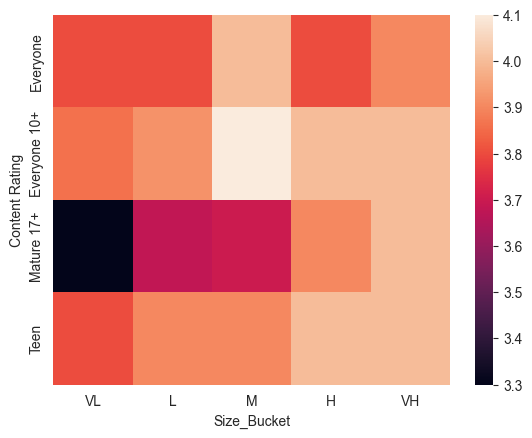

In [128]:
sns.heatmap(res)
plt.show()

#### Customizing the heatmap

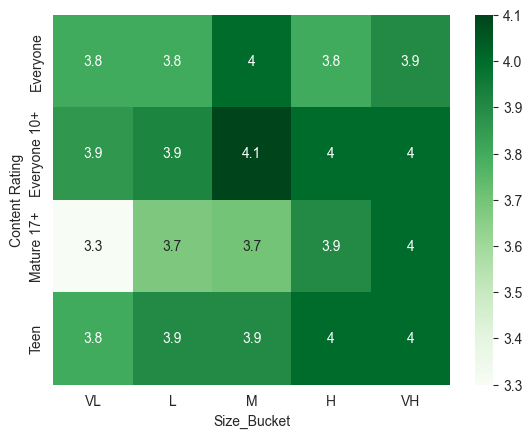

In [129]:
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

#### Trying out different themes of heatmaps

Mako

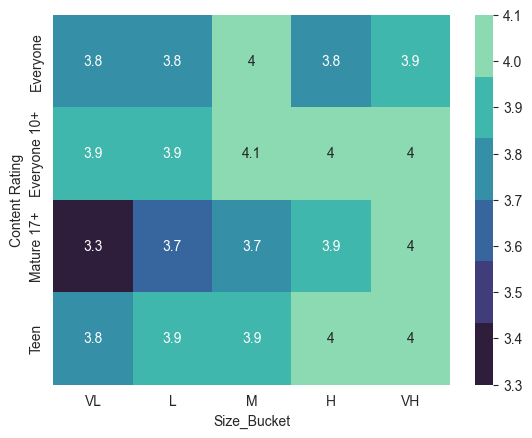

In [130]:
# creating a colormap
colormap = sns.color_palette("mako")
sns.heatmap(res, annot = True,cmap = colormap)
plt.show()

Viridis

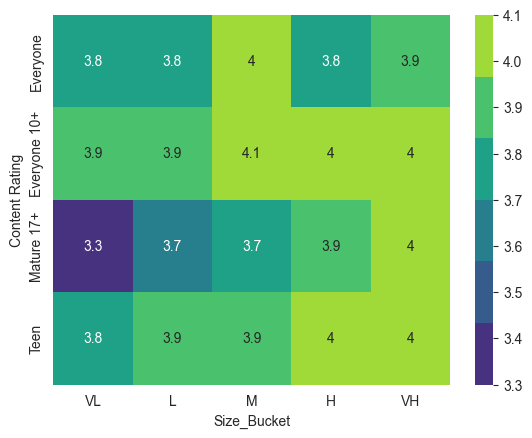

In [131]:
colormap = sns.color_palette("viridis")
sns.heatmap(res, annot = True,cmap = colormap)
plt.show()

Flare

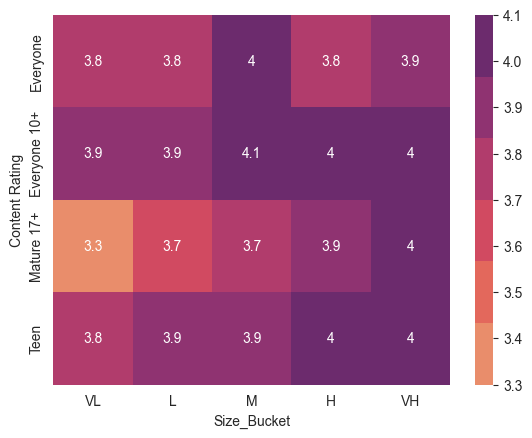

In [132]:
colormap = sns.color_palette("flare")
sns.heatmap(res, annot = True,cmap = colormap)
plt.show()

Rocket r

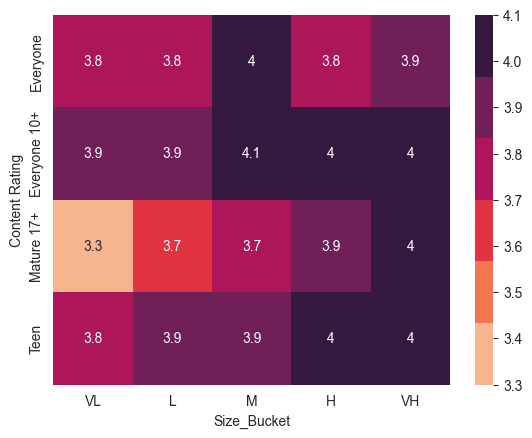

In [133]:
colormap = sns.color_palette("rocket_r")
sns.heatmap(res, annot = True,cmap = colormap)
plt.show()

Magma

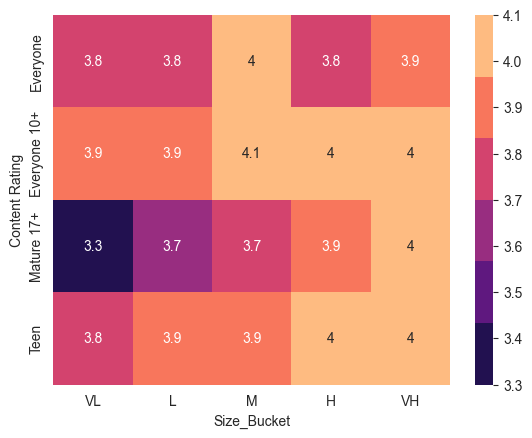

In [134]:
colormap = sns.color_palette("magma")
sns.heatmap(res, annot = True,cmap = colormap)
plt.show()

#### Analyze the Ratings by Months

In [135]:
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

In [136]:
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [137]:
inp1['Updated_Month'] = pd.to_datetime(inp1['Last Updated']).dt.month

In [138]:
inp1.groupby(['Updated_Month'])['Rating'].mean()

Updated_Month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153308
6     4.172590
7     4.222999
8     4.269286
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

#### Plotting the analysis on Line Chart

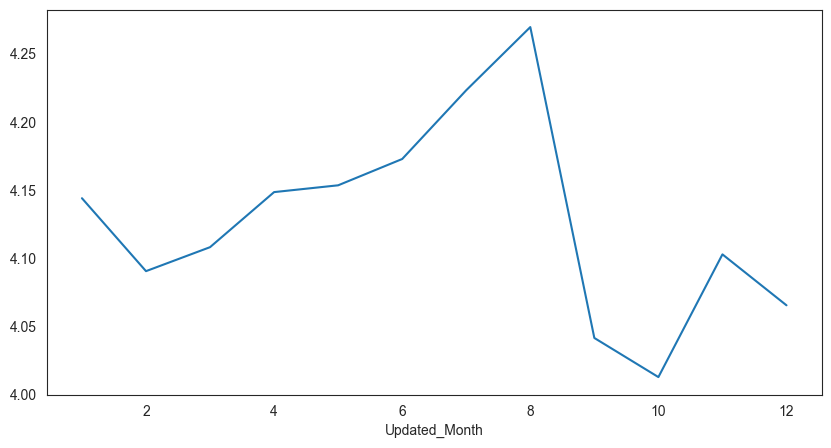

In [139]:
plt.figure(figsize = [10,5])
inp1.groupby(['Updated_Month'])['Rating'].mean().plot()
plt.show()

#### Stacked Bar Charts

In [140]:
pd.pivot_table(data=inp1, values='Installs',index='Updated_Month',columns='Content Rating',aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_Month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,2361067800,118173500,50140100,202689600
6,2427170505,317727100,145257200,415716600
7,8271109680,456556000,419491910,1943556800
8,7430943320,215821000,312981700,6257855650
9,260340410,24931100,2201010,22483100


In [141]:
monthly = pd.pivot_table(data=inp1, values='Installs',index='Updated_Month',columns='Content Rating',aggfunc=sum)

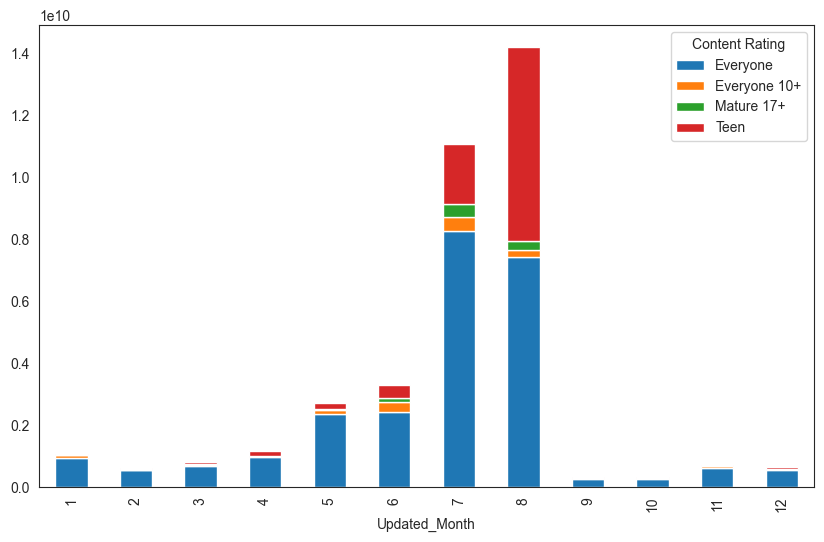

In [142]:
monthly.plot(kind = 'bar',stacked = True, figsize = [10,6])
plt.show()

As the growth in each segment is not clearly mentioned in this plot we will create proportions then we will create a chart.

In [143]:
monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis=1)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_Month,,,,
1,0.853262,0.097076,0.008945,0.040717
2,0.882747,0.032083,0.021077,0.064093
3,0.853576,0.037222,0.011184,0.098018
4,0.836553,0.020025,0.004520,0.138902
5,0.864204,0.043254,0.018352,0.074189
6,0.734200,0.096110,0.043939,0.125751
7,0.745769,0.041166,0.037824,0.175242
8,0.522658,0.015180,0.022014,0.440148
9,0.839928,0.080434,0.007101,0.072537


In [144]:
monthly_perc = monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis=1)

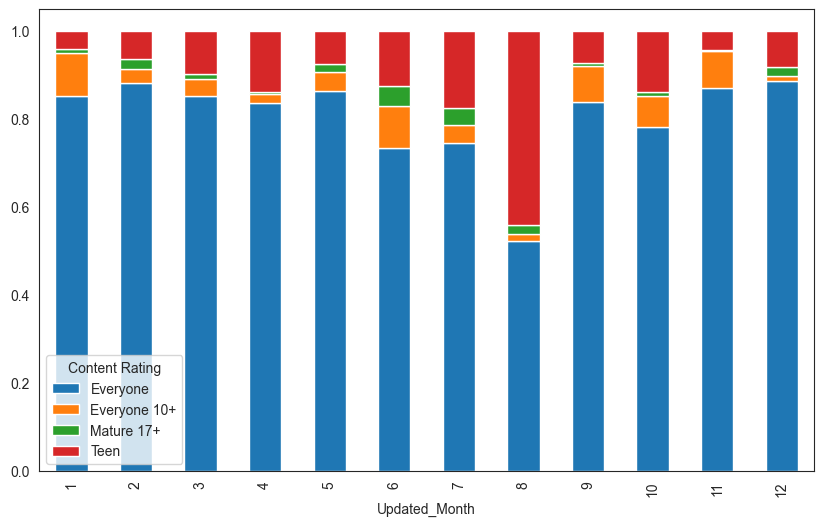

In [145]:
monthly_perc.plot(kind = 'bar',stacked = True, figsize = [10,6])
plt.show()

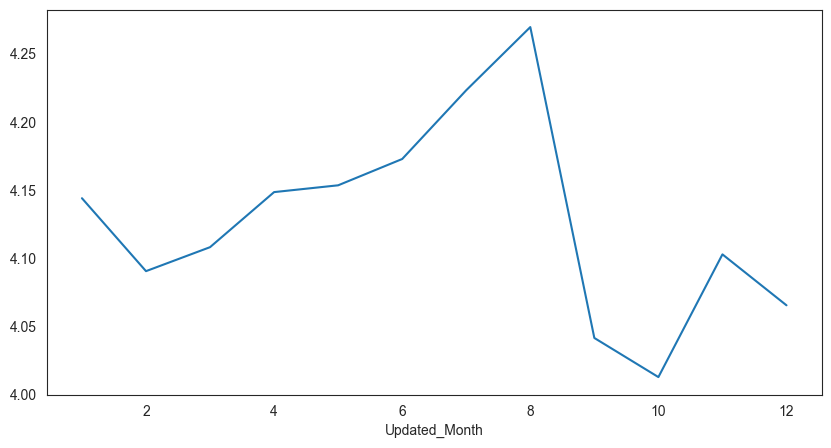

In [146]:
plt.figure(figsize = [10,5])
inp1.groupby(['Updated_Month'])['Rating'].mean().plot()
plt.show()

Due to the summer break in the colleges, the installs for the teen apps significantly grew.

#### Using plotly for better visualization

In [147]:
res2 = inp1.groupby(['Updated_Month'])[['Rating']].mean()

In [148]:
res2.reset_index(inplace=True)

In [151]:
fig = px.line(res2,x='Updated_Month',y='Rating',title='Monthly Average Rating')
fig.show()